# import libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,power_transform

# modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Data Overview

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df_t = pd.read_csv("/kaggle/input/titanic/test.csv")
df_g = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
df.shape

(891, 12)

Training df contain **``891 Columns``** and **``12 Rows``**

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are `few nulls in column Age, Embarked` and `a lot in column Cabin`

There are few object column `(Name, Sex, Ticket, Cabin, Embarked)` that needs to be encoded

## Data columns Unique

In [8]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64','int32']).columns.tolist()

In [9]:
for c in cat_cols:
    print(f"{c}'s Unique values: {df[c].unique()}")
    print("-------------\n")

Name's Unique values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. E

In [10]:
for c in num_cols:
    print(f"{c}'s Unique values: {df[c].unique()}")
    print("-------------\n")

PassengerId's Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 2

# Data Visualization

## percentage of gender

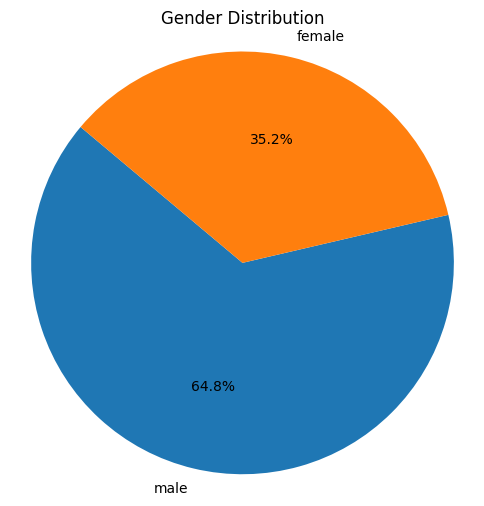

In [11]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 6))  # Adjust the figure size if necessary
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Calculate overall survival rate


In [12]:
overall_survival_rate = df['Survived'].mean()
print(f"\nOverall survival rate: {overall_survival_rate:.2f}")


Overall survival rate: 0.38


## Survival rate by gender

In [13]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nSurvival rate by gender:")
print(survival_rate_by_gender)


Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


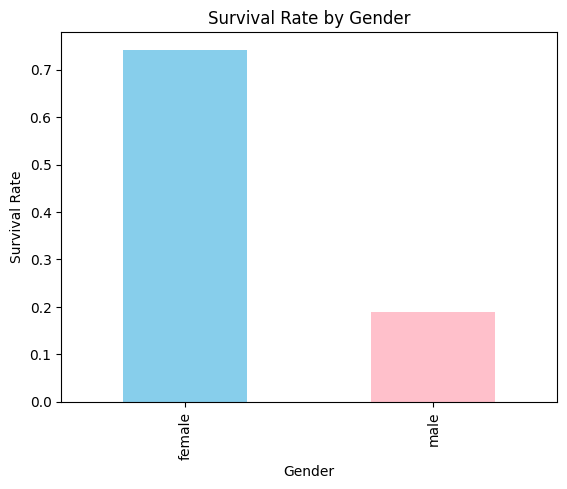

In [14]:
survival_rate_by_gender.plot(kind='bar', title='Survival Rate by Gender', color=['skyblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

## Calculate survival rates by passenger class

In [15]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:")
print(survival_rate_by_class)


Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


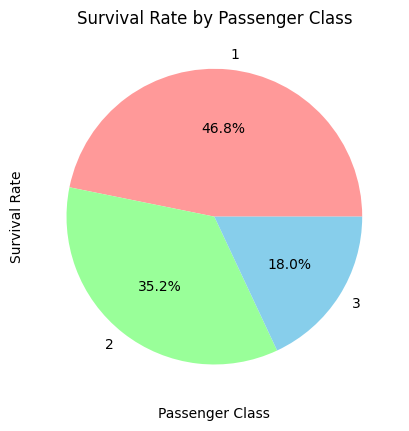

In [16]:
survival_rate_by_class.plot(kind='pie', title='Survival Rate by Passenger Class', autopct='%1.1f%%', colors=['#FF9999', '#99FF99', 'skyblue'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Calculate survival rates by embarkation point

In [17]:
survival_rate_by_embarked = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival rate by embarkation point:")
print(survival_rate_by_embarked)


Survival rate by embarkation point:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


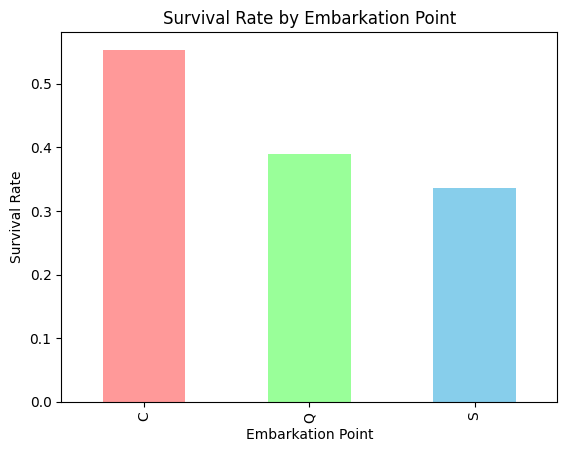

In [18]:
# Survival rate by embarkation point
survival_rate_by_embarked.plot(kind='bar', title='Survival Rate by Embarkation Point', color=['#FF9999', '#99FF99', 'skyblue'])
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

## Analyze survival rate by age

In [19]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_bins = [0, 12, 20, 40, 60, 80]
age_labels = ['0-12', '13-20', '21-40', '41-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
df.drop('AgeGroup',axis=1, inplace=True)
print("\nSurvival rate by age group:")
print(survival_rate_by_age_group)


Survival rate by age group:
AgeGroup
0-12     0.579710
13-20    0.381818
21-40    0.397403
41-60    0.390625
61+      0.227273
Name: Survived, dtype: float64


/tmp/ipykernel_18/807081470.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()


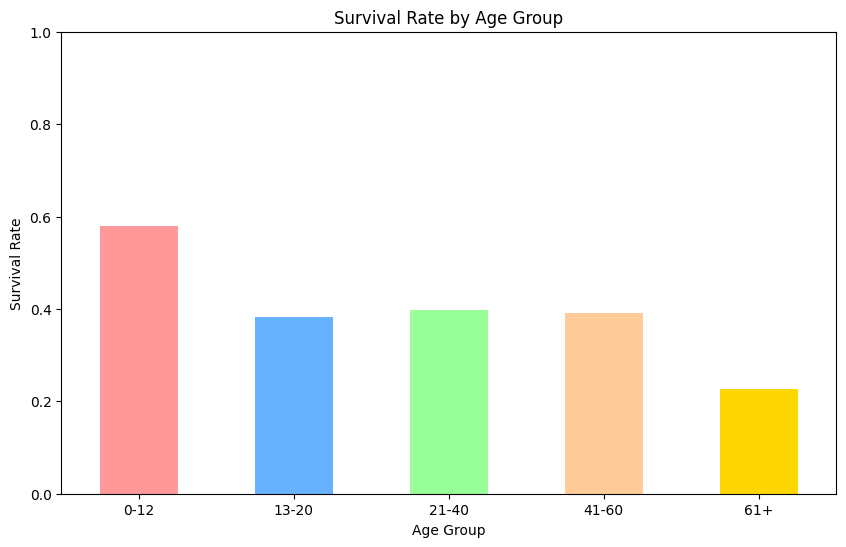

In [20]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

plt.figure(figsize=(10, 6))
survival_rate_by_age_group.plot(kind='bar', color=colors)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()

# Data Preprocessing

## Nulls

### Check for nulls

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* There are `177 nulls` in `Age` column that `can be dropped` or `replaced with the median` of the column
* There are `687 nulls` in `Cabin` column that are `a lot to be dropped`, so they maybe be `replaced with the mode` of column or `better to drop the whole column`.
* There are `2 nulls` in `Embarked` column that `can be dropped` or `replaced with the median` of the column

### Replace null values

#### Age column

In [22]:
# replace with median of the column
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_18/344279034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


#### Cabin column

In [23]:
# replace with the mode of the column
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

/tmp/ipykernel_18/3826013193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


#### Embarked column

In [24]:
# replace with the mode of the column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_18/3276497982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


## Duplicates

In [25]:
print(df.duplicated().sum())  

0


there is no duplicated rows in the data

## Encoding

In [26]:
# get columns with data type (object)
print(cat_cols)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### label encoding

In [27]:
encoder = LabelEncoder()

In [28]:
df['Name'] = encoder.fit_transform(df['Name'])
df['Cabin'] = encoder.fit_transform(df['Cabin'])
df['Ticket'] = encoder.fit_transform(df['Ticket'])

### manual mapping

In [29]:
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df['Embarked'] = df['Embarked'].map({'C':0, 'S':1, 'Q':2})

## Scaling of the data

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.361582,0.523008,0.381594,338.528620,32.204208,53.639731,0.897868
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,23.568293,0.514624
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,47.000000,1.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,1.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


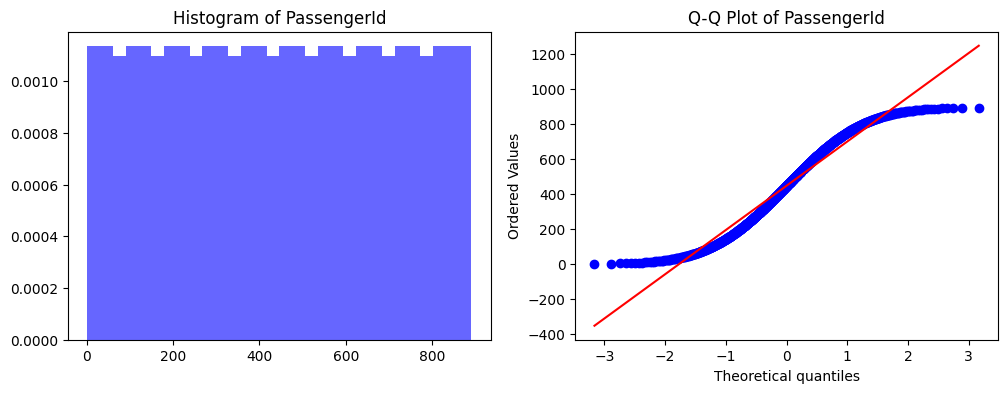

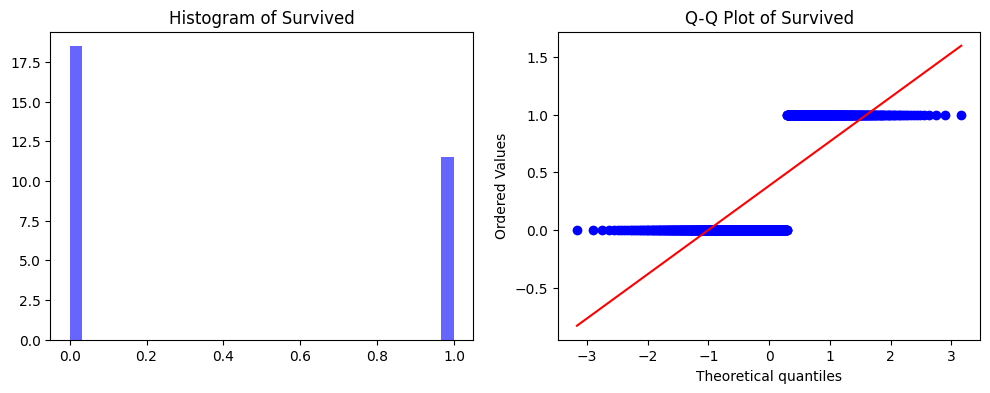

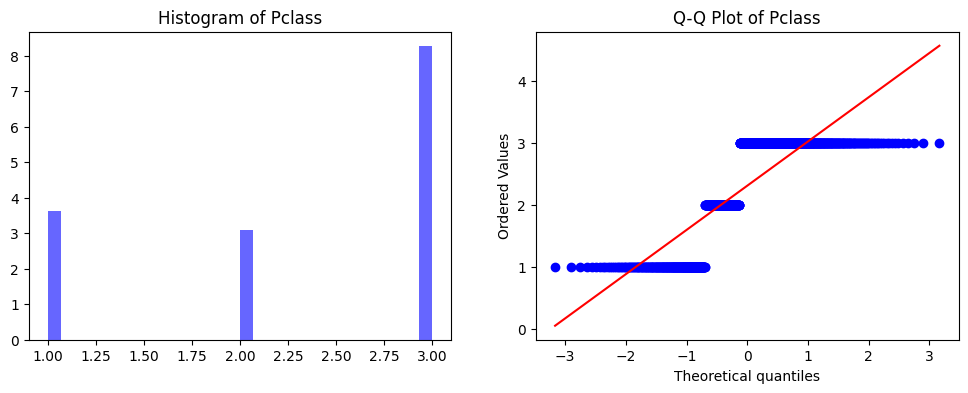

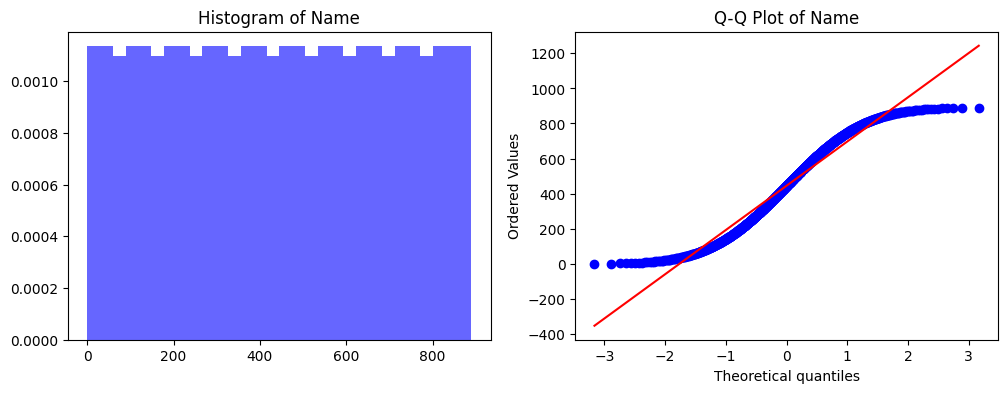

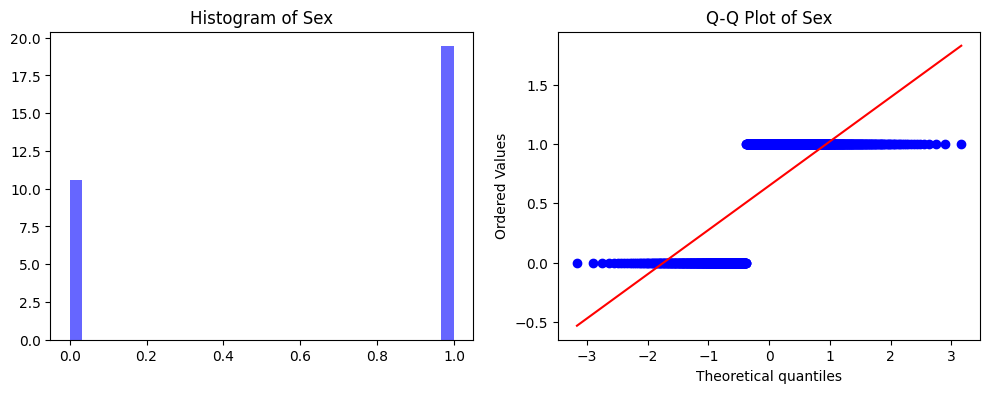

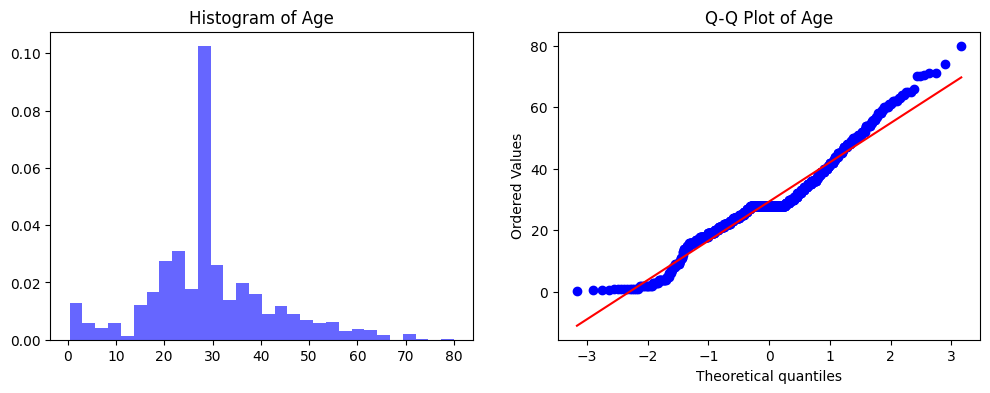

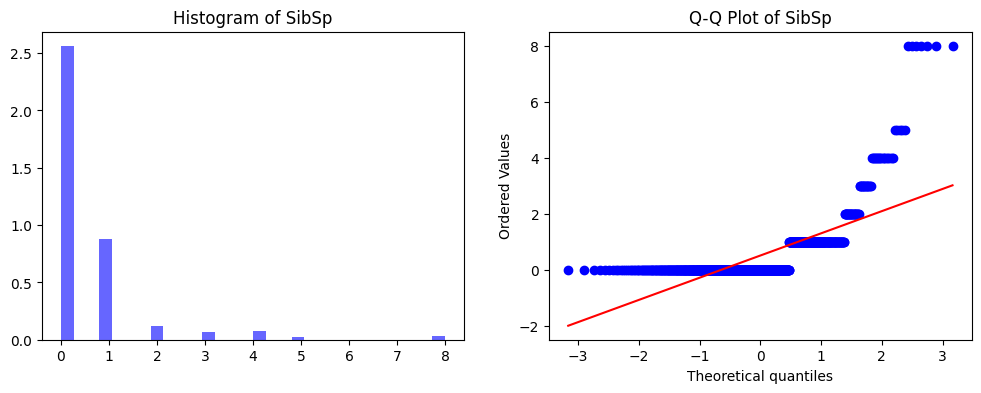

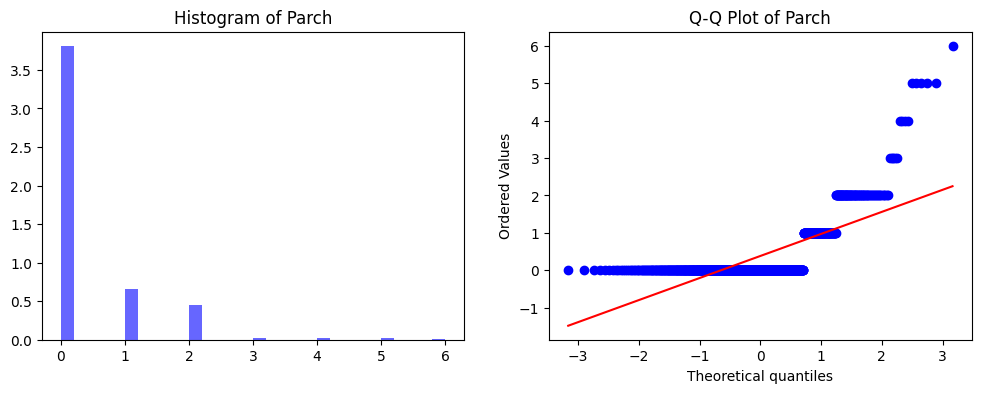

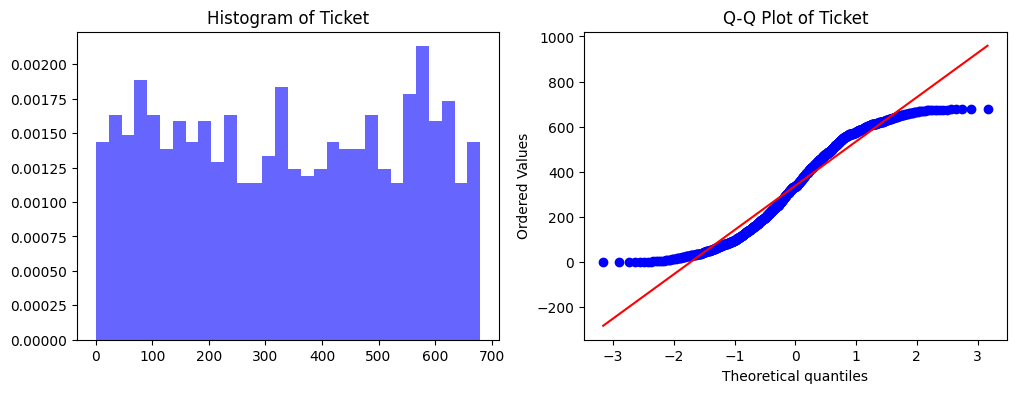

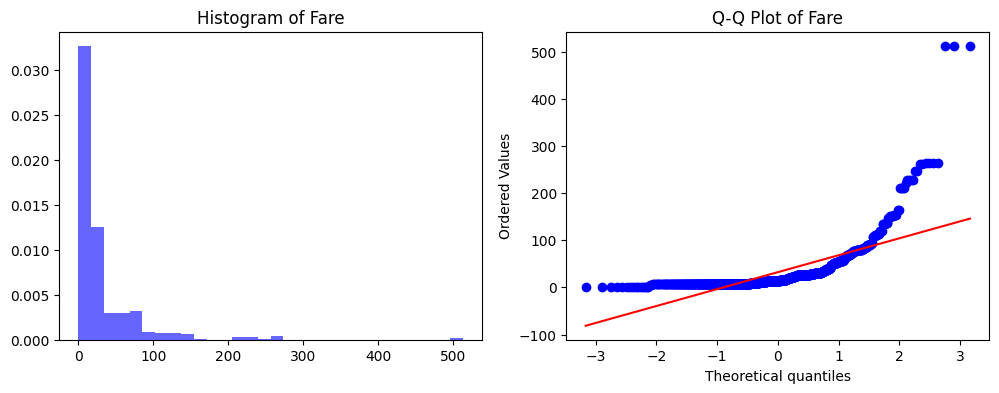

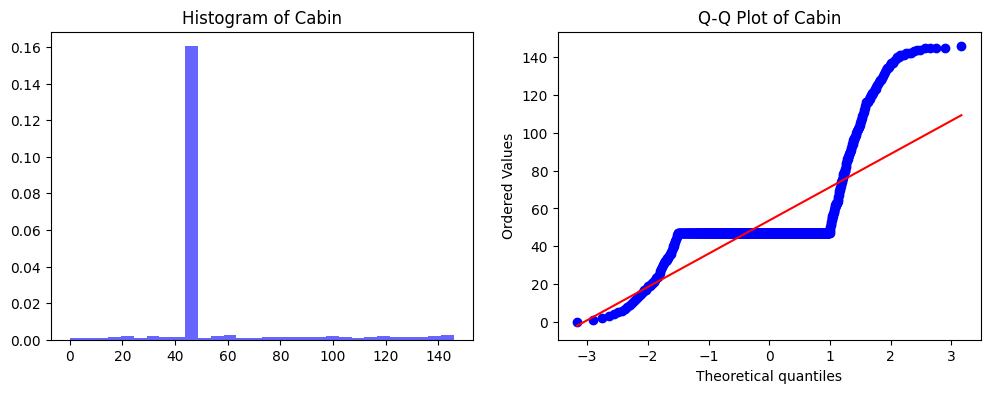

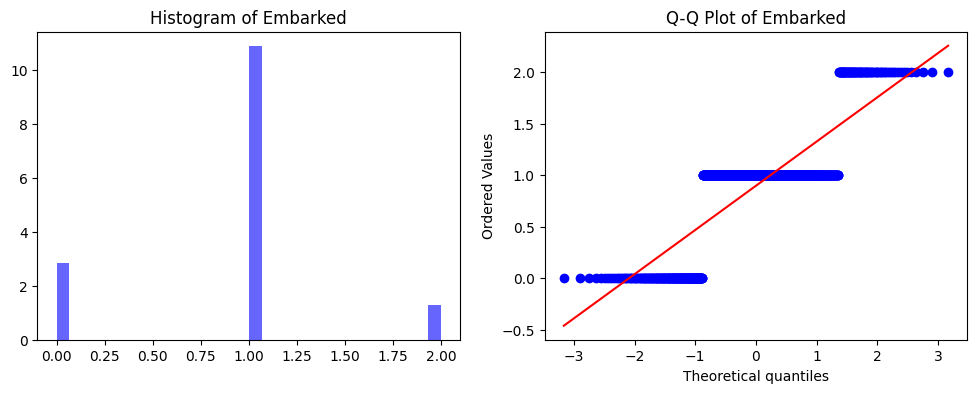

In [31]:
for col in df.columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, density=True, alpha=0.6, color='b')
    plt.title('Histogram of ' + col)

    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title('Q-Q Plot of ' + col)

    plt.show()

In [32]:
def check_normality(df):
    for col in df.columns:
        shapiro_test = stats.shapiro(df[col])
        dagostino_test = stats.normaltest(df[col])
        anderson_test = stats.anderson(df[col])

        # Determine normality based on p-values
        shapiro_normal = shapiro_test.pvalue > 0.05
        dagostino_normal = dagostino_test.pvalue > 0.05
        anderson_normal = anderson_test.statistic < anderson_test.critical_values[2]

        # Output whether the column is normally distributed or not
        # print(f"Column: {col}")
        # print("Is normally distributed (Shapiro-Wilk Test)?", shapiro_normal)
        # print("Is normally distributed (D'Agostino's K^2 Test)?", dagostino_normal)
        # print("Is normally distributed (Anderson-Darling Test)?", anderson_normal)
        # print()
        print(f"Column '{col}' is {'normally distributed' if shapiro_normal and dagostino_normal and anderson_normal else 'not normally distributed'}.")


In [33]:
check_normality(df)

Column 'PassengerId' is not normally distributed.
Column 'Survived' is not normally distributed.
Column 'Pclass' is not normally distributed.
Column 'Name' is not normally distributed.
Column 'Sex' is not normally distributed.
Column 'Age' is not normally distributed.
Column 'SibSp' is not normally distributed.
Column 'Parch' is not normally distributed.
Column 'Ticket' is not normally distributed.
Column 'Fare' is not normally distributed.
Column 'Cabin' is not normally distributed.
Column 'Embarked' is not normally distributed.


### find the best transformation for the columns

In [34]:
def check_shapiro(data):
    stat, p_value = stats.shapiro(data)
    return p_value

In [35]:
def apply_transformations(df):
    transformations = {
        'log': lambda x: np.log1p(x),
        'sqrt': lambda x: np.sqrt(x),
        'boxcox': lambda x: stats.boxcox(x + 1)[0] if np.all(x > -1) else x
        }

    best_transformations = {}

    for col in df.columns:
        if df[col].dtype.kind in 'bifc':
            best_p_value = -1
            best_transformation = None
            best_data = df[col]

            # Check normality of original data
            original_p_value = check_shapiro(df[col])
            if original_p_value > best_p_value:
                best_p_value = original_p_value
                best_transformation = 'none'
                best_data = df[col]

            # Try each transformation
            for name, transform in transformations.items():
                try:
                    transformed_data = transform(df[col])
                    p_value = check_shapiro(transformed_data)

                    if p_value > best_p_value:
                        best_p_value = p_value
                        best_transformation = name
                        best_data = transformed_data
                except Exception as e:
                    print(f"Transformation {name} failed for column {col} with error: {e}")
                    continue

            best_transformations[col] = (best_transformation, best_p_value)
            df[col] = best_data

    return df, best_transformations

In [36]:
df, best_transformations = apply_transformations(df)

for col, (transformation, p_value) in best_transformations.items():
    print(f"Column '{col}': Best transformation: {transformation}, Shapiro-Wilk p-value: {p_value}")

Column 'PassengerId': Best transformation: boxcox, Shapiro-Wilk p-value: 1.7940356875588686e-15
Column 'Survived': Best transformation: none, Shapiro-Wilk p-value: 1.7945308393836472e-40
Column 'Pclass': Best transformation: none, Shapiro-Wilk p-value: 3.3958319924210316e-36
Column 'Name': Best transformation: boxcox, Shapiro-Wilk p-value: 1.8290293714670223e-15
Column 'Sex': Best transformation: none, Shapiro-Wilk p-value: 6.201446353869478e-41
Column 'Age': Best transformation: boxcox, Shapiro-Wilk p-value: 8.029488634045661e-15
Column 'SibSp': Best transformation: sqrt, Shapiro-Wilk p-value: 4.4636793126787004e-39
Column 'Parch': Best transformation: sqrt, Shapiro-Wilk p-value: 6.654766407078556e-42
Column 'Ticket': Best transformation: boxcox, Shapiro-Wilk p-value: 9.73035715603278e-17
Column 'Fare': Best transformation: log, Shapiro-Wilk p-value: 6.641617113173131e-22
Column 'Cabin': Best transformation: boxcox, Shapiro-Wilk p-value: 6.900133768181832e-41
Column 'Embarked': Best t

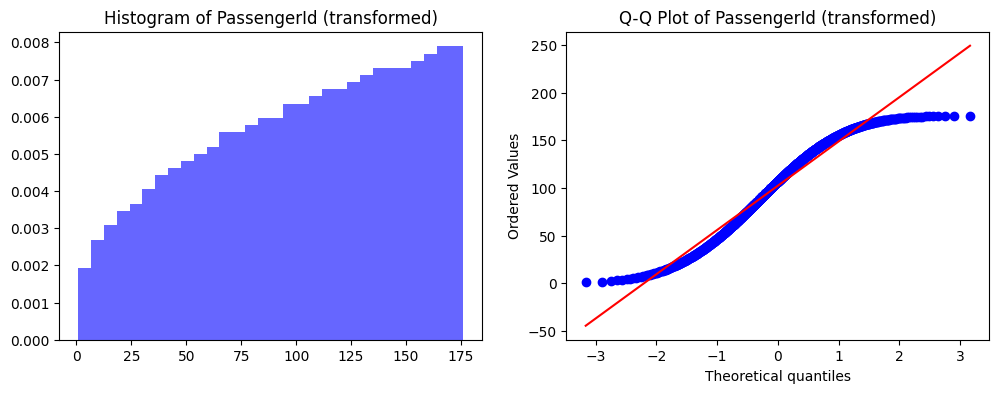

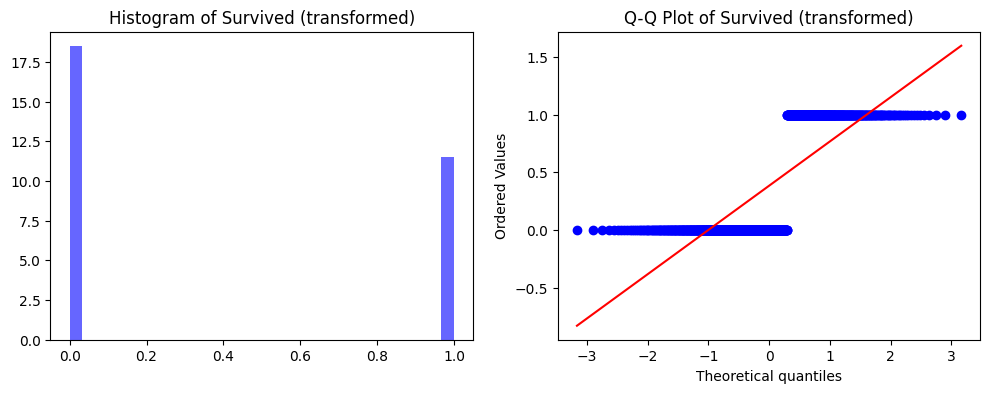

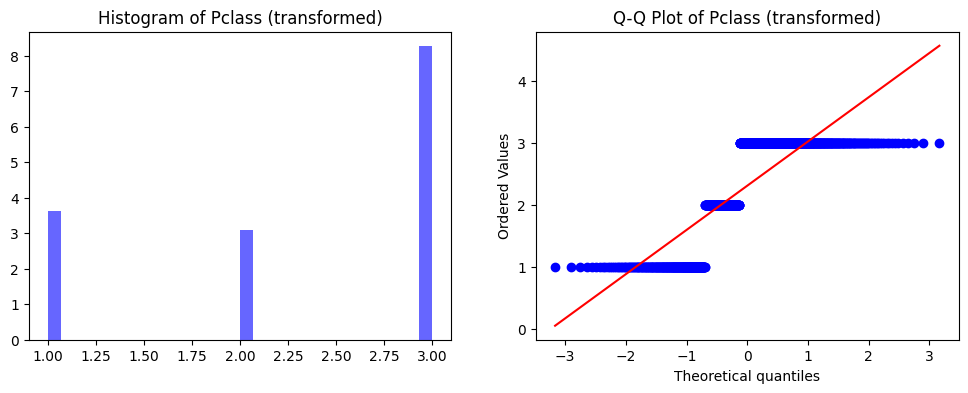

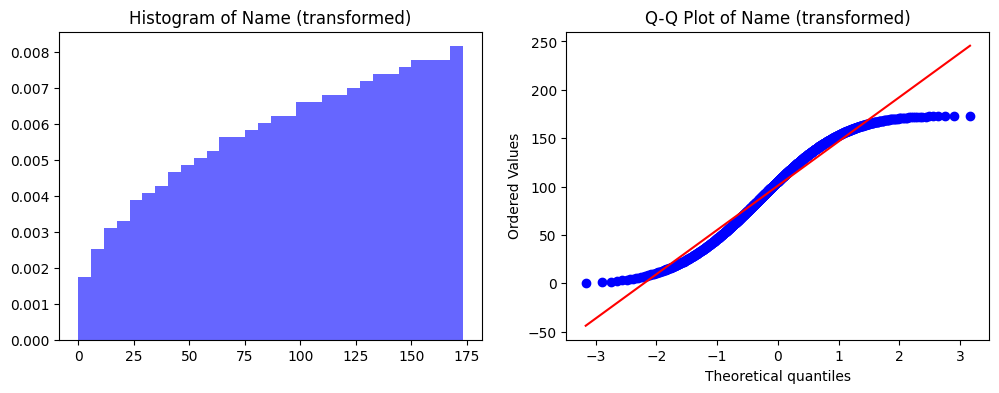

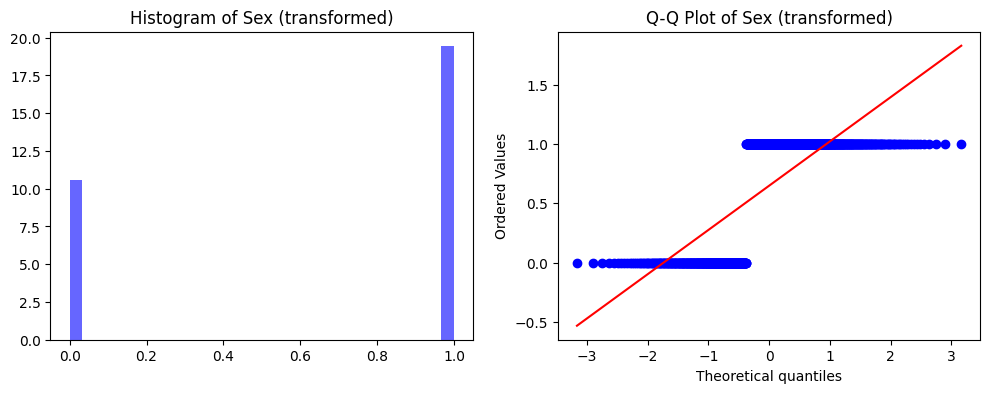

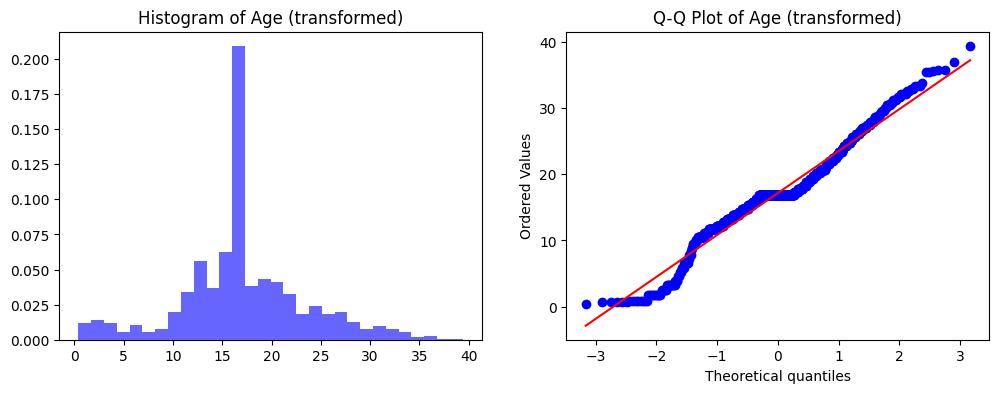

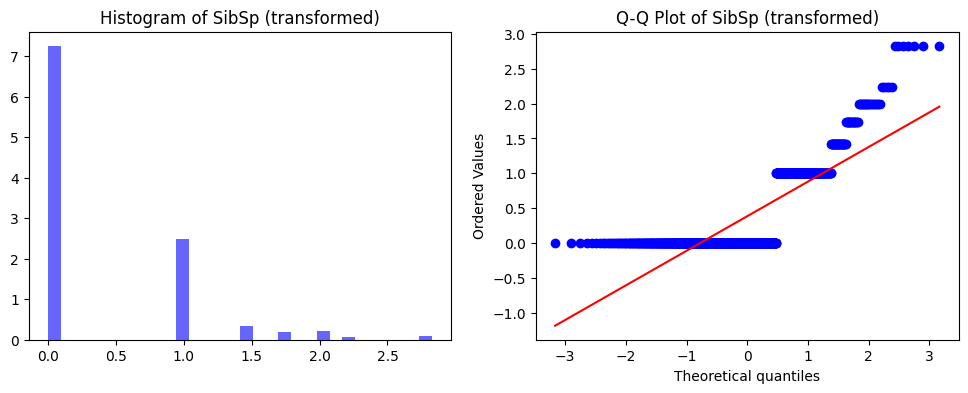

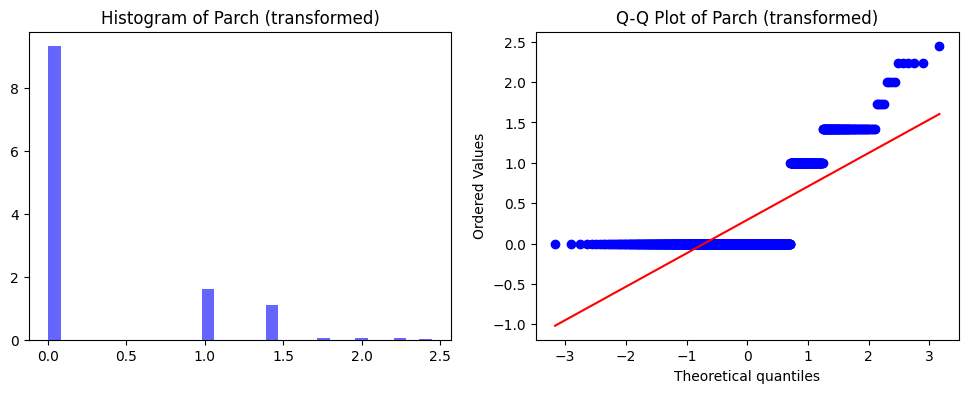

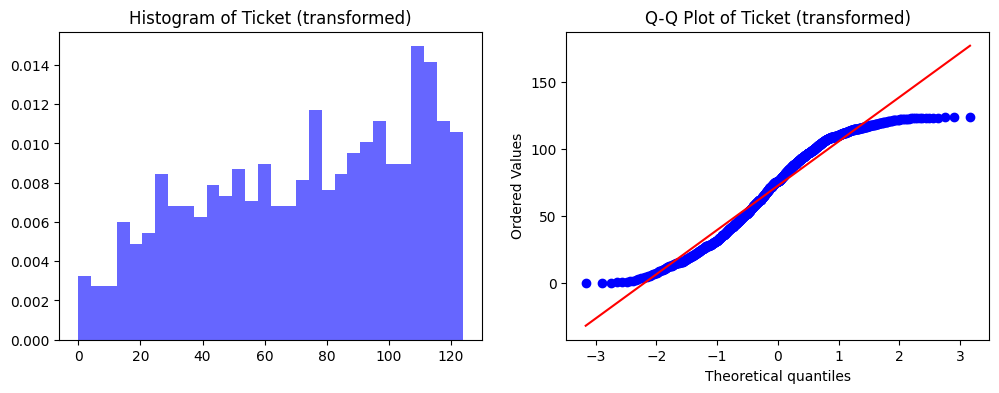

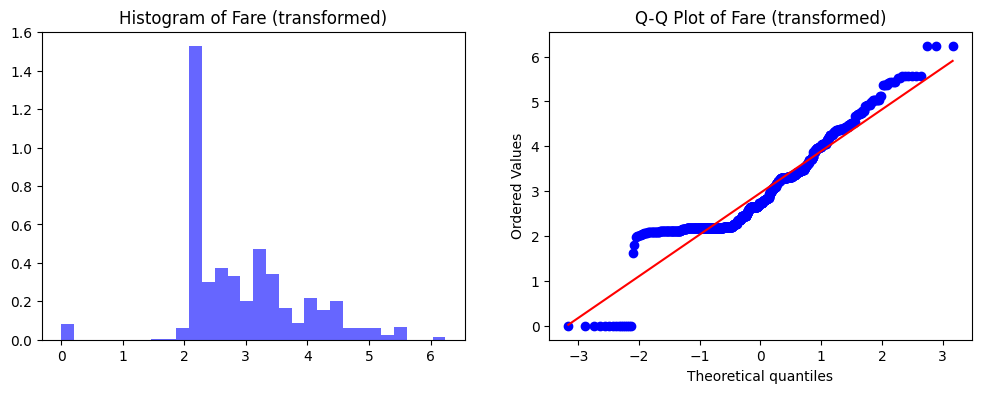

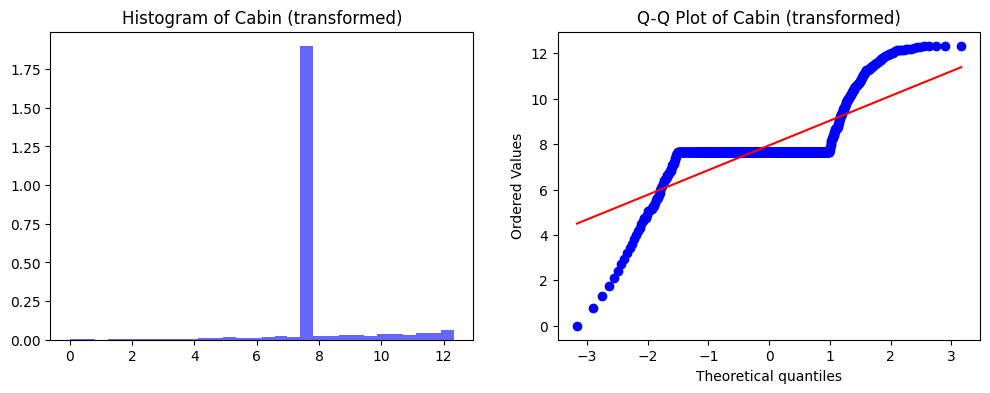

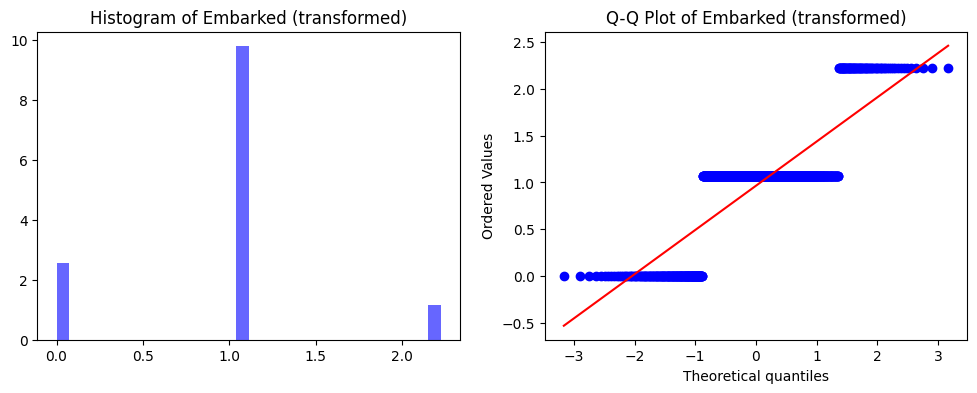

In [37]:
for col in df.columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, density=True, alpha=0.6, color='b')
    plt.title(f'Histogram of {col} (transformed)')

    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} (transformed)')

    plt.show()

## dropping columns

In [38]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

dropping columns like `'PassengerId'`, `'Name'`, `'Ticket'`, `'Cabin'` is better asa they have a lot of unique values and `this can lead to over fitting` when predict

## Outliers

#### Check for outliers

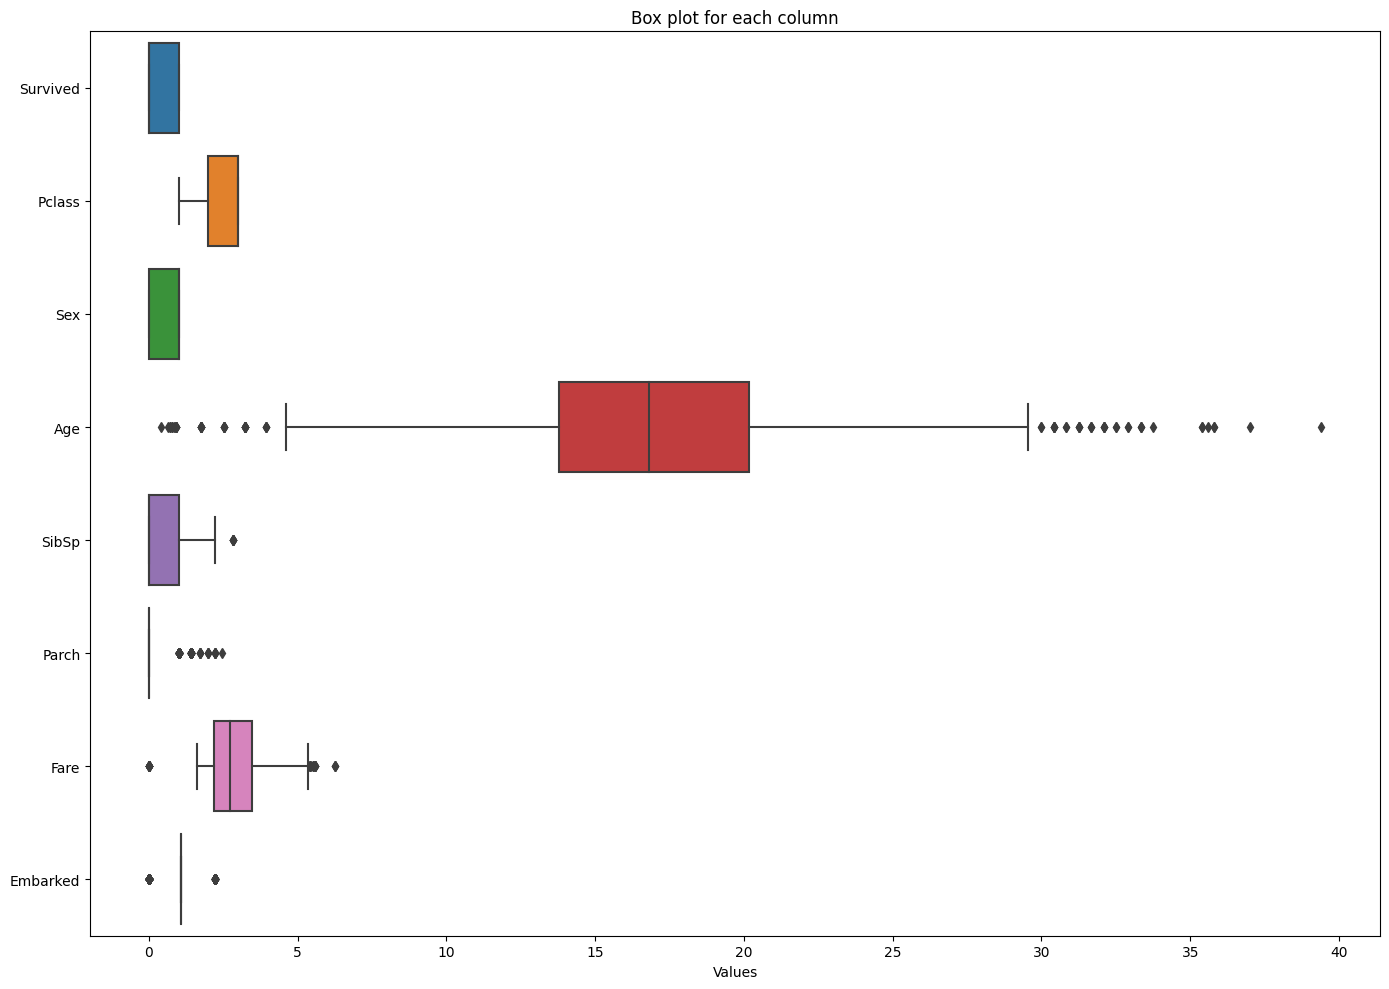

In [39]:
plt.figure(figsize=(14,10))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

In [40]:
# Function to identify outliers based on IQR
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)

    return outliers

In [41]:
# list for columns contain outliers
outliers_cols = []

for column in df.columns:
    # Check if the column is numeric (assuming outliers are relevant for numeric data)

      outliers = find_outliers(df[column])
      num_outliers = outliers.sum()

      if num_outliers > 0:
        outliers_cols.append(column)

      print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'Survived': 0
Number of outliers in 'Pclass': 0
Number of outliers in 'Sex': 0
Number of outliers in 'Age': 79
Number of outliers in 'SibSp': 7
Number of outliers in 'Parch': 213
Number of outliers in 'Fare': 31
Number of outliers in 'Embarked': 245


* Number of outliers in `Age` : 66
* Number of outliers in `SibSp` : 46
* Number of outliers in `Parch` : 213
* Number of outliers in `Fare` : 116
* Number of outliers in `Embarked` : 245

### Handling outliers

In [42]:
def handle_outliers_iqr(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)

        # Calculate IQR
        iqr = q3 - q1

        # Define lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replace outliers with the boundaries of IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

In [43]:
## Handling outliers using IQR
df = handle_outliers_iqr(df.copy(), outliers_cols)

## Feature Selection 

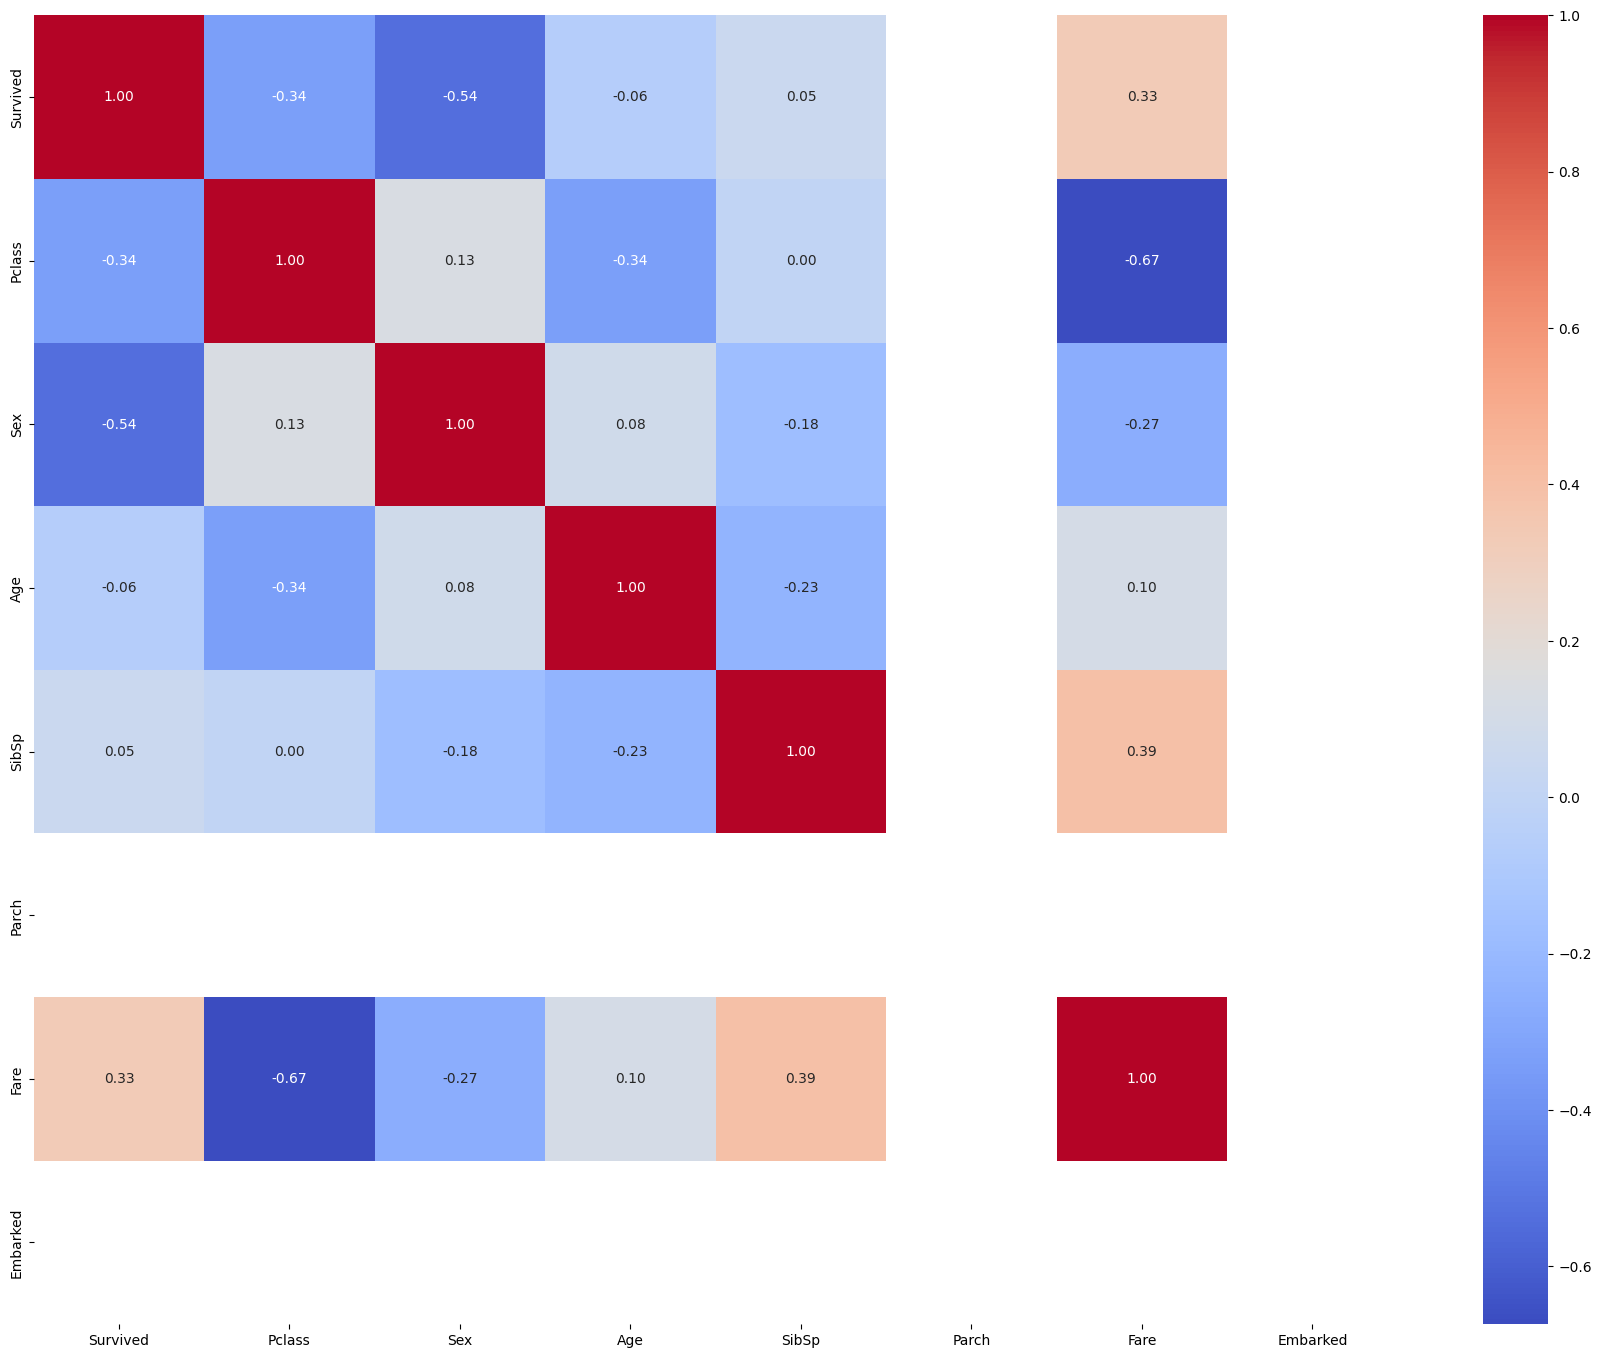

In [44]:
plt.figure(figsize=(22, 17))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

it seems that `Parch` column is the least in correlation, `we can remove it and try`

i tried to not drop it and it get more accuracy in `Random Forest Model`

In [45]:
# df.drop(columns= 'Parch',axis=1, inplace=True)

# Modeling

## prepare test data

### Drop unwanted columns

In [46]:
df_t.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [47]:
print(df_t.columns.tolist())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


### Handle nulls

In [48]:
df_t.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [49]:
df_t['Age'] = df['Age'].fillna(df['Age'].median())
df_t['Fare'] = df['Fare'].fillna(df['Fare'].median())

### Encoding

In [50]:
df_t['Sex'] = df_t['Sex'].map({'male':1, 'female':0})
df_t['Embarked'] = df_t['Embarked'].map({'C':0, 'S':1, 'Q':2})

### Handle outliers

In [51]:
df_t = handle_outliers_iqr(df_t.copy(), df_t.columns)

## Separate train and test data 

In [52]:
# training data
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']

# testing data
X_test = df_t
y_test = df_g['Survived'].values

In [53]:
# Check shapes
print("Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (891, 7)
y_train: (891,)
X_test: (418, 7)
y_test: (418,)


## Try some models

In [54]:
# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier()
}

# Dictionary to store the performance metrics
performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the metrics
    performance[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
        }

# Print the performance metrics for each model
for model_name, metrics in performance.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("--------------------------------------------------")


Model: RandomForest
Accuracy: 0.7775
Precision: 0.7778
Recall: 0.7775
F1 Score: 0.7777
--------------------------------------------------
Model: LogisticRegression
Accuracy: 0.8852
Precision: 0.8855
Recall: 0.8852
F1 Score: 0.8853
--------------------------------------------------
Model: GaussianNB
Accuracy: 0.9402
Precision: 0.9438
Recall: 0.9402
F1 Score: 0.9407
--------------------------------------------------
Model: KNeighbors
Accuracy: 0.7775
Precision: 0.7792
Recall: 0.7775
F1 Score: 0.7783
--------------------------------------------------


as it is:
* rf -> 79
* lr -> 88
* gnb -> 94
* knn -> 77

without dropping parch: 
* rf -> 80
* lr -> 88
* gnb -> 94
* knn -> 77

when not dropping cabin, parch and ticket:
* rf -> 76
* lr -> 36
* gnb -> 70
* knn -> 59

## Grid Search

In [55]:
# Define the parameter grid for each model
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'GaussianNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-10]
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Initialize the GridSearchCV objects and fit to the data
best_estimators = {}
for model_name, params in param_grid.items():
    grid_search = GridSearchCV(models[model_name], param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {model_name}: {grid_search.best_score_:.4f}")
    # print(f"Mean fit time for {model_name}: {grid_search.cv_results_['mean_fit_time'].mean():.4f} seconds")
    print("--------------------------------------------------")

Best parameters for RandomForest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy for RandomForest: 0.8351
--------------------------------------------------
Best parameters for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
Best cross-validated accuracy for LogisticRegression: 0.7879
--------------------------------------------------
Best parameters for GaussianNB: {'var_smoothing': 1e-09}
Best cross-validated accuracy for GaussianNB: 0.7621
--------------------------------------------------
Best parameters for KNeighbors: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validated accuracy for KNeighbors: 0.7924
--------------------------------------------------


## Final Models

### Random Forest

In [56]:
rf = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 50)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

print(f"Model: {model_name}")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Model: KNeighbors
Training Accuracy: 0.8990
Testing Accuracy: 0.8254
Precision: 0.8236
Recall: 0.8254
F1 Score: 0.8238


### Logistic Regression

In [57]:
lr = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

print(f"Model: {model_name}")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Model: KNeighbors
Training Accuracy: 0.7890
Testing Accuracy: 0.8852
Precision: 0.8855
Recall: 0.8852
F1 Score: 0.8853


### GaussianNB

In [58]:
gnb = GaussianNB(var_smoothing=1e-09)
gnb.fit(X_train,y_train)
y_train_pred = gnb.predict(X_train)
y_pred = gnb.predict(X_test)

print(f"Model: {model_name}")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Model: KNeighbors
Training Accuracy: 0.7508
Testing Accuracy: 0.9402
Precision: 0.9438
Recall: 0.9402
F1 Score: 0.9407
